In [ ]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pylab as plt

In [ ]:
data_df = pd.read_csv("WestRoxbury_V2.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Show the first 10 rows of the dataset

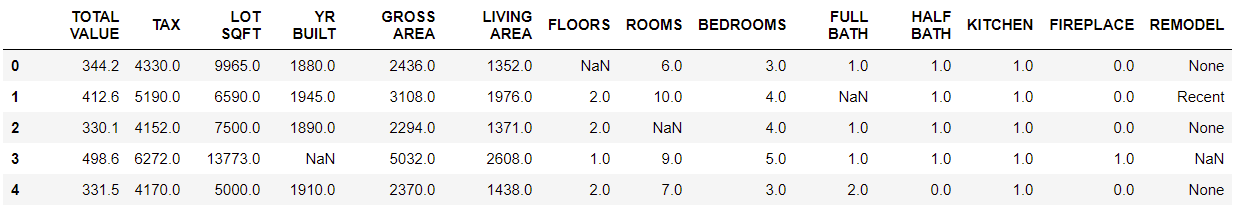

In [ ]:
# Show the last 10 rows of the dataset

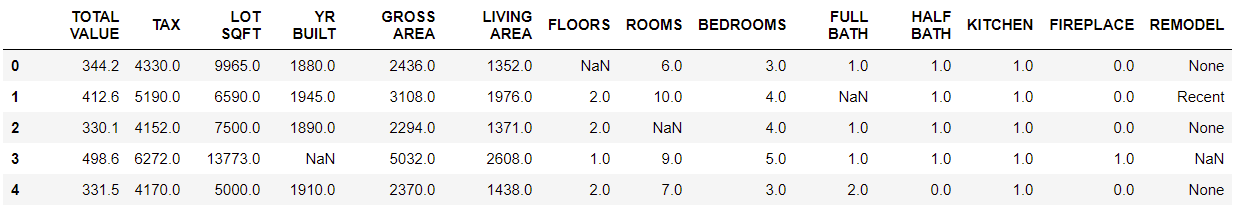

In [ ]:
# Show the descriptive statistics for numeric variables

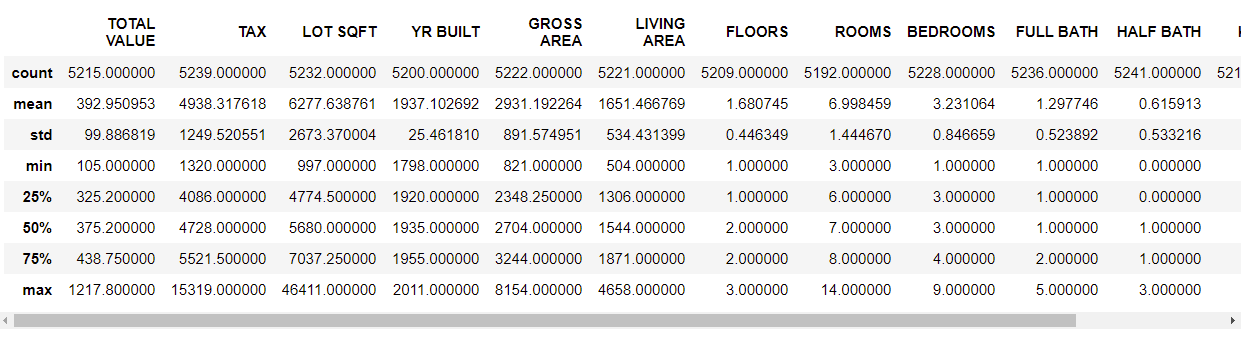

In [ ]:
# Show the variables names, non-null values, and datatypes

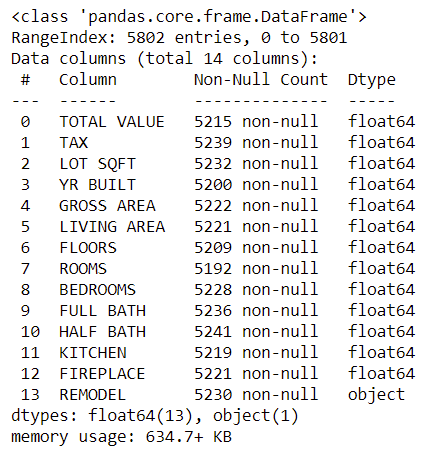

In [ ]:
# There is a YR BUILT value of zero for one of the samples (a data entry error that must be corrected)

data_df = data_df[data_df['YR BUILT'] > 0] # only keep all samples where YR BUILT > 0

In [ ]:
# Show the counts per class of REMODEL

data_df['REMODEL'].value_counts()

In [ ]:
# Some characters cause problems in names, so we change those characters (empty space and hyphens) into underscores

data_df.columns = [s.strip().replace(' ', '_') for s in data_df.columns] # change spaces into underscores in variable names
data_df.columns = [s.strip().replace('-', '_') for s in data_df.columns] # change hyphens into underscores in variable names
data_df.columns

#### Scatterplots

In [ ]:
# the basic pandas scatterplot

data_df.???.???(x='GROSS_AREA', y='TOTAL_VALUE', legend=False, color='mediumblue')

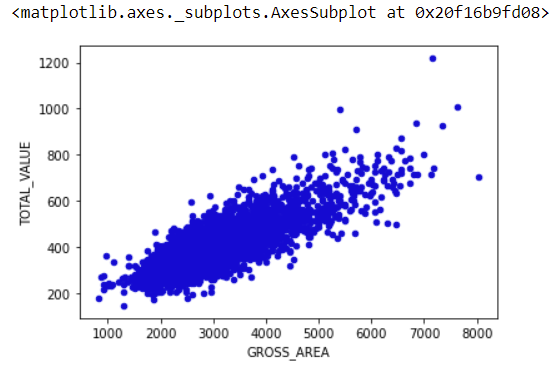

In [ ]:
# Matplotlib scatterplot

fig, ax = plt.subplots() # extracts two elements, fig (the picture itself) and ax (the plot or graph)

fig.set_size_inches(???, ???) # sets the size of the plot to 10 x 6 inches

ax.scatter(data_df.GROSS_AREA, data_df.???, color='steelblue', facecolor='orangered') # assigns scatterplot

plt.xlabel('Gross Area') # axis labels may be different than the variable names
plt.ylabel('Total Value')

plt.tight_layout() # makes the size of the plot the same as the frame (no margin)

plt.show() # this is required to display the plot

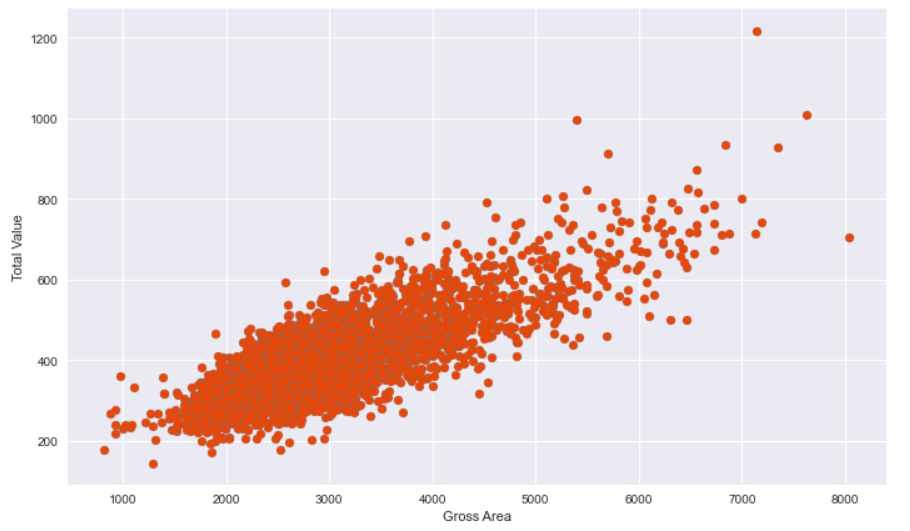

In [ ]:
# generate a scatterplot showing lot size versus year built

data_df.plot.scatter(x=???, y=???, legend=False, color='mediumblue')

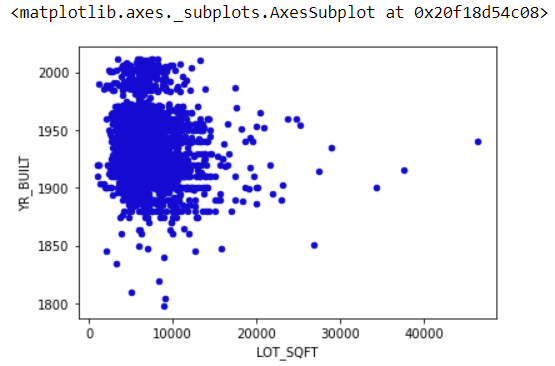

In [ ]:
# log transform variable(s) before plotting to reveal patterns

data_df['LOT_SQFT_log'] = np.log((data_df.LOT_SQFT)+1)

data_df['YR_BUILT_log'] = np.log((data_df.YR_BUILT)+1)

# the basic pandas scatterplot
data_df.plot.scatter(x='LOT_SQFT_log', y='YR_BUILT_log', legend=False, color='mediumblue')

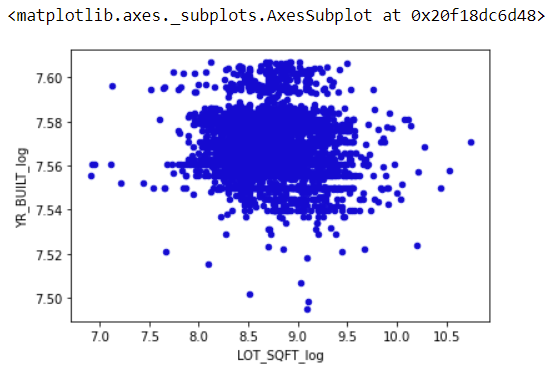

In [ ]:
# Add a categorical variable to a scatterplot

data_df.plot.scatter(x='GROSS_AREA', y='TOTAL_VALUE', 
                     c=['darkorange' if c == "None" else 'royalblue' for c in data_df.???])

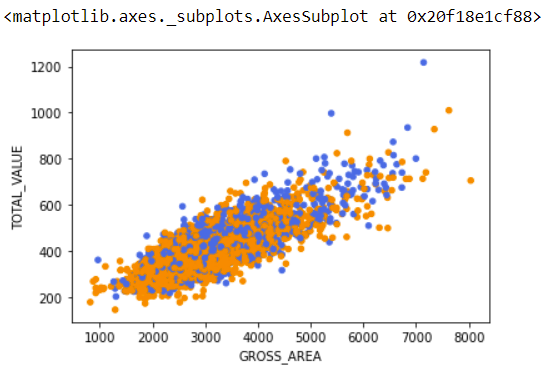

#### Bar Charts

In [ ]:
ax = data_df.groupby('REMODEL').mean().???.plot(kind='bar', figsize=[???, ???], color='orangered')

ax.set_ylabel('Avg. TOTAL VALUE')

plt.tight_layout()
plt.show()

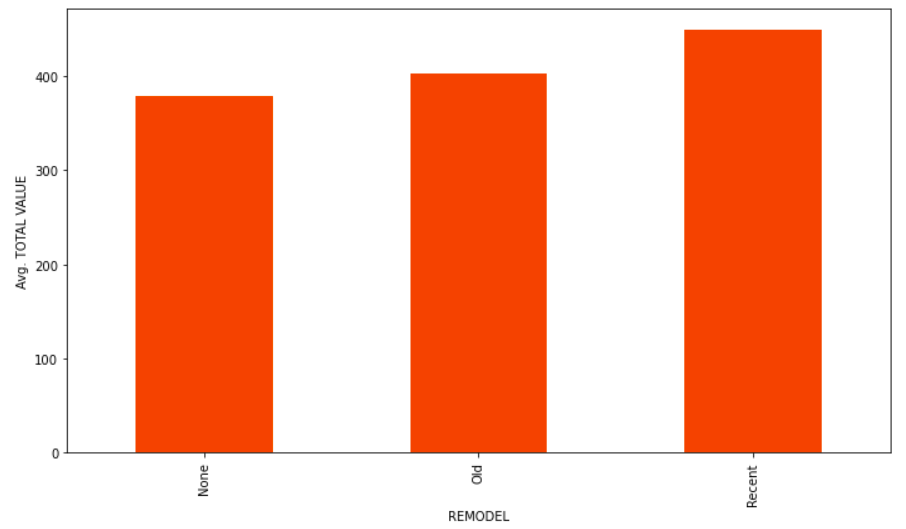

#### Line Graph

In [ ]:
bike_df = pd.read_csv('bicycle_by_day.csv', squeeze=True)

In [ ]:
# Show the first five rows of the bicycle data

In [ ]:
# Show the descriptive statistics for the numeric variables

In [ ]:
bike_df['Date'] = pd.to_datetime(bike_df.dteday, format='%m/%d/%Y')

rental_ts = pd.Series(bike_df.cnt.values, index=bike_df.Date)

In [ ]:
rental_ts.plot(ylim=[0, 10000], 
               legend=False, 
               figsize=[6, 4], 
               color='darkorange')

plt.xlabel('Year')  # set x-axis label
plt.ylabel('Rentals')  # set y-axis label

plt.tight_layout()
plt.show()

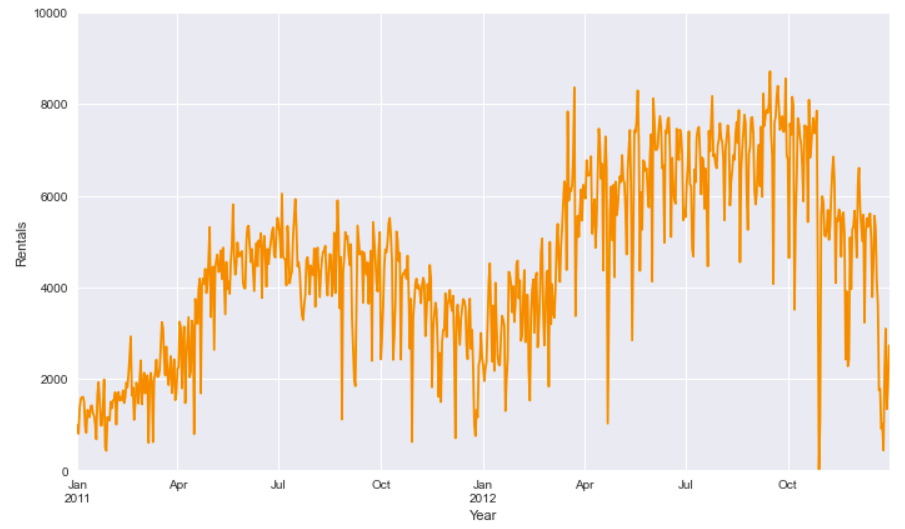

#### Boxplots

In [ ]:
ax = data_df.boxplot(column='TOTAL_VALUE', by=???)

ax.set_ylabel('TOTAL_VALUE')

#plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

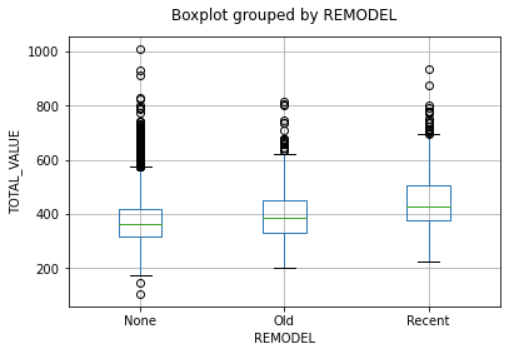

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (10, 6))

data_df.boxplot(column='TOTAL_VALUE', by=???, ax=axes[0])

data_df.boxplot(column=???, by='REMODEL', ax=axes[1])

data_df.boxplot(column=???, by=???, ax=axes[???])

for ax in axes:
    ax.set_xlabel('REMODEL')
    
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

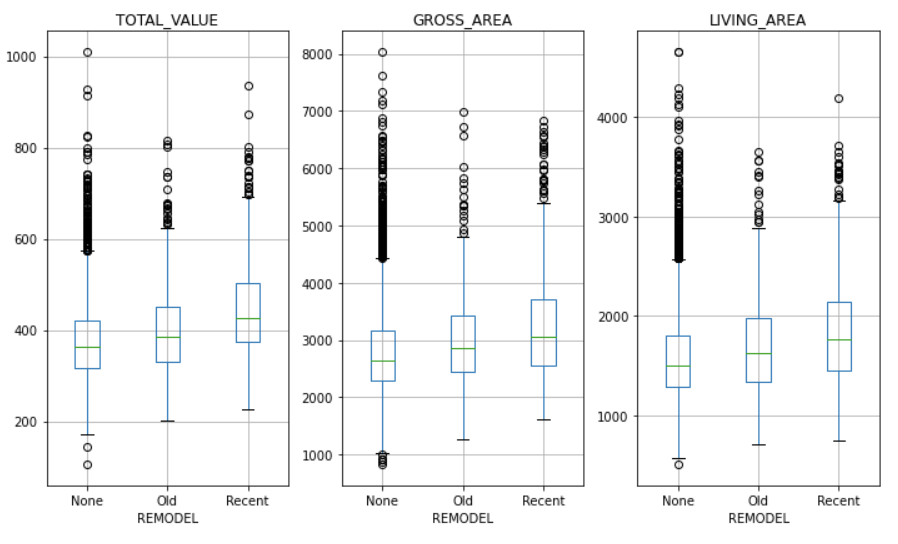

#### Violin Plots

In [ ]:
plt.figure(figsize=(10,6))

sns.violinplot(x=???, y=???, data=data_df)

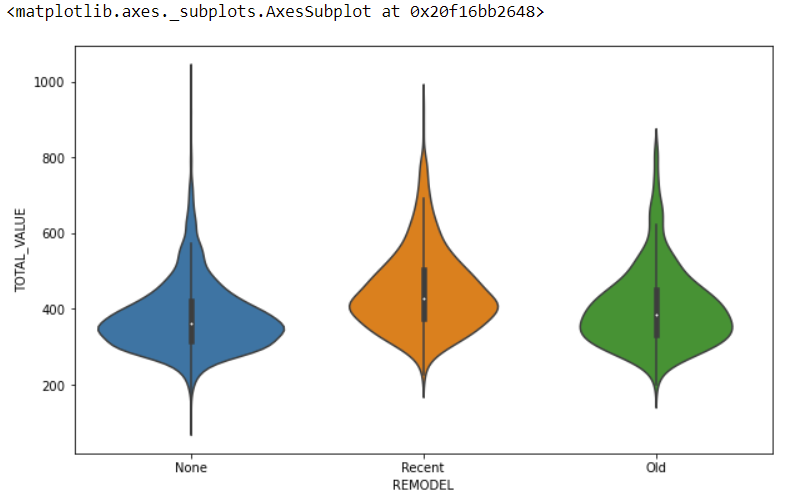

#### Histogram with KDE

In [ ]:
fig, ax = plt.subplots(1,1)

sns.histplot(???.???, 
             bins=???,
             kde=True,
             label='TOTAL_VALUE', 
             color='mediumblue')

ax.set_title('Total Value Distribution', fontsize=20)
ax.set(xlabel='Total Value', ylabel='count')

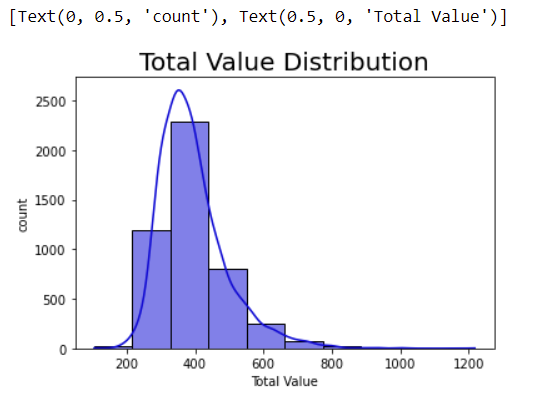

#### Color Coded Correlation Chart with numeric values overlay

In [ ]:
# color-coded heatmap with correlation values

corr = data_df.???

fig, ax = plt.subplots()

fig.set_size_inches(11, 7)

sns.heatmap(???, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

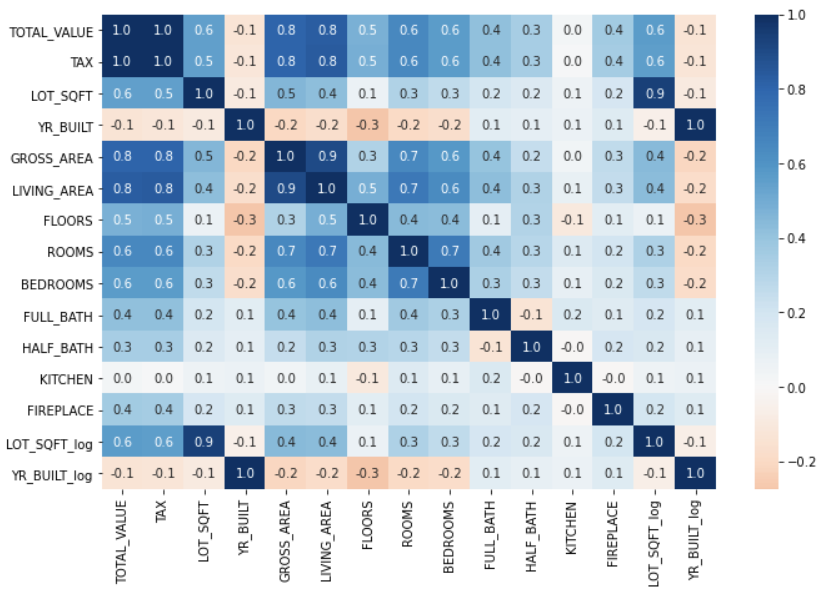

#### Missing Value Analysis

In [ ]:
# This shows missing values in a list format

pd.DataFrame({'miss.val': data_df.isnull().sum(),
             })

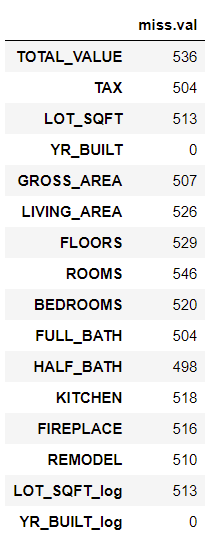

In [ ]:
# This shows missing values in a bar chart format

msno.???(???, color='deepskyblue')

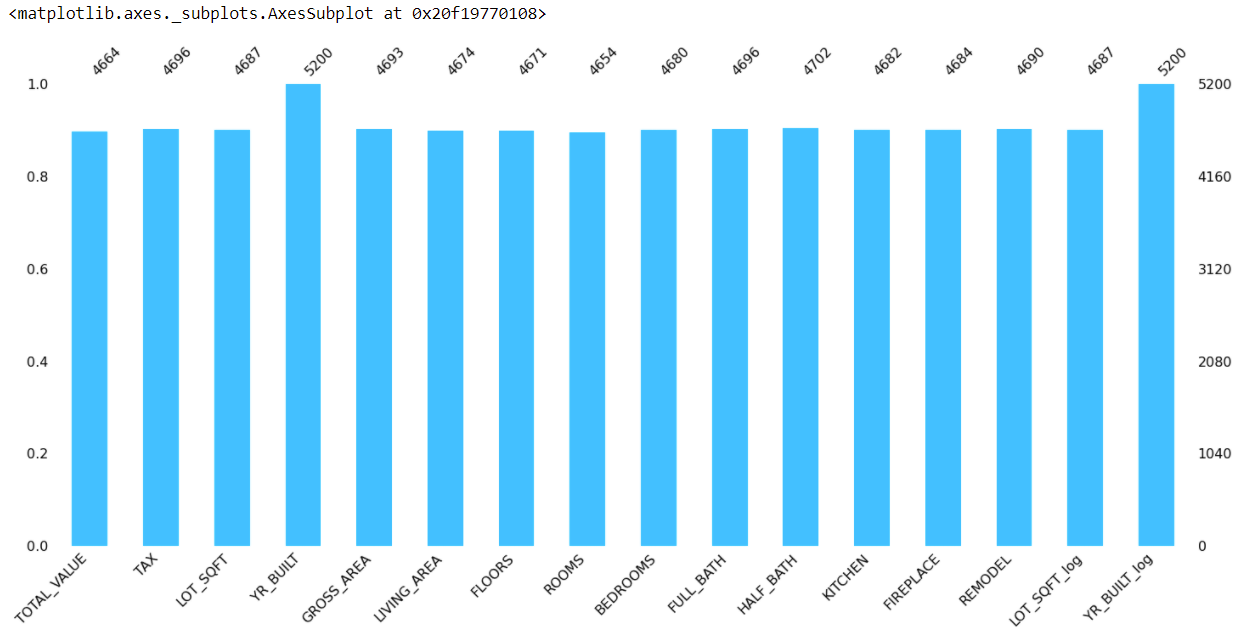

In [ ]:
# This shows the nullity correlations

msno.???(???)

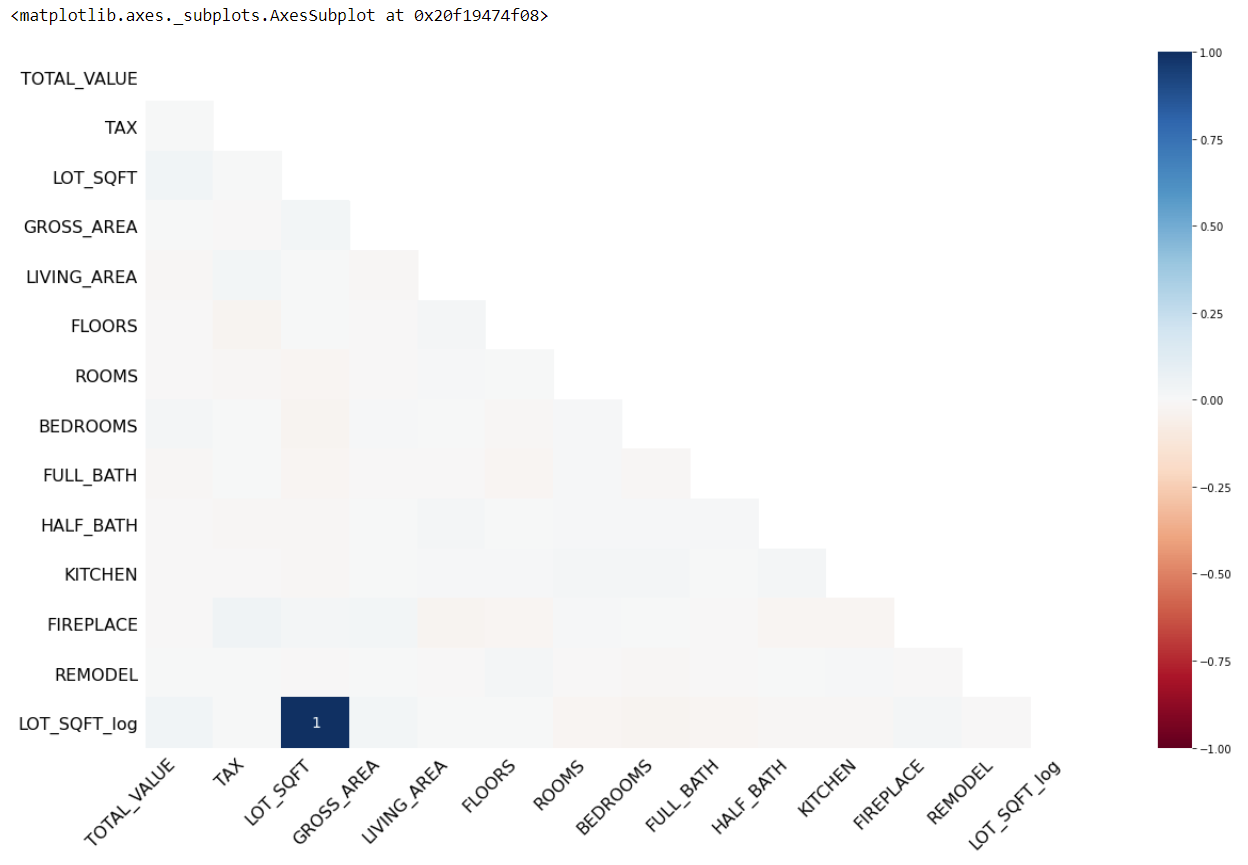

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ""
separator = ","

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar="TOTAL_VALUE",
    dfte = data_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)